In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import show
import seaborn as sns

In [2]:
import lightgbm as lgb

/Users/fanggot/anaconda/lib/python3.5/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


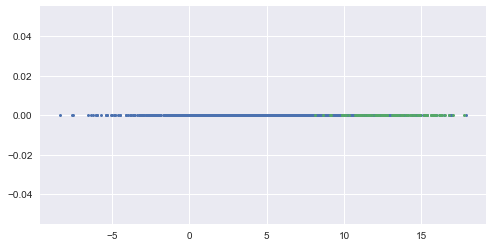

In [3]:
mean_1 = 5
var_1 = 4
mean_2 = 13
var_2 = 2
x_1 = np.random.normal(loc=mean_1, scale=var_1, size=1900)
x_2 = np.random.normal(loc=mean_2, scale=var_2, size=100)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x_1, np.zeros_like(x_1), 'o', markersize = 3)
ax.plot(x_2, np.zeros_like(x_2), 'o', markersize = 3)
show()

In [4]:
xt_1 = np.random.normal(loc=mean_1, scale=var_1, size=3800)
xt_2 = np.random.normal(loc=mean_2, scale=var_2, size=200)
yt_1 = np.zeros_like(xt_1)
yt_2 = np.array(np.random.choice([0,1], size=200, p=[.5,.5]))
conc_xt = np.concatenate([xt_1, xt_2])
conc_yt = np.concatenate([yt_1, yt_2])
test_data = {'x': conc_xt, 'y': conc_yt}
test_df = pd.DataFrame(data = test_data)
test_imb = lgb.Dataset(test_df['x'].values.reshape((4000,1)), label=test_df['y'].values)

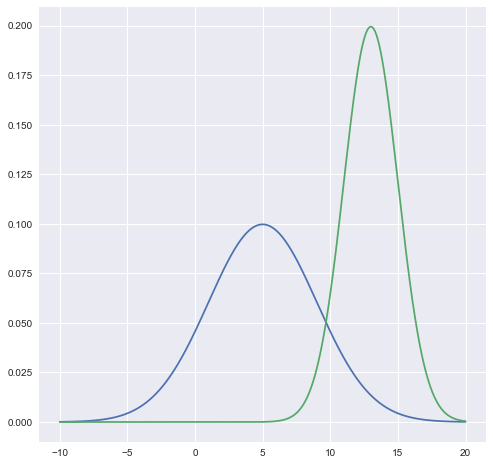

In [5]:
x_axis = np.arange(-10, 20, 0.001)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x_axis,sp.stats.norm.pdf(x_axis,mean_1, var_1))
ax.plot(x_axis,sp.stats.norm.pdf(x_axis,mean_2, var_2))
show()

In [6]:
y_1 = np.zeros_like(x_1)
y_2 = np.array(np.random.choice([0,1], size=100, p=[.5,.5]))

In [7]:
conc_x = np.concatenate([x_1, x_2])
conc_y = np.concatenate([y_1, y_2])

In [8]:
data = {'x': conc_x, 'y': conc_y}
df = pd.DataFrame(data = data)

In [9]:
df.head(10)

,x,y
0,13.171697,0.0
1,3.714383,0.0
2,11.525311,0.0
3,5.902478,0.0
4,5.178036,0.0
5,6.045656,0.0
6,-3.857871,0.0
7,-1.221142,0.0
8,5.646225,0.0
9,3.337784,0.0


In [10]:
np.unique(df['y'], return_counts=True)

(array([0., 1.]), array([1957,   43]))

In [11]:
imb_data = lgb.Dataset(df['x'].values.reshape((2000,1)), label=df['y'].values)

In [12]:
param = {'objective': 'binary', 'num_leaves': 2, 'bagging_fraction': 0.7, 
         'learning_rate': 0.1, 'min_child_samples': 50, 'bagging_freq': 5, 'bagging_seed': 1234 }

In [13]:
param = {'objective': 'binary', 'num_leaves': 2, 'learning_rate': 0.1}

In [14]:
bst = lgb.train(param, imb_data, num_boost_round=100, valid_sets= test_imb, early_stopping_rounds=10
          , verbose_eval=10)

Training until validation scores don't improve for 10 rounds.
[10]	valid_0's binary_logloss: 0.0711453
[20]	valid_0's binary_logloss: 0.0661508
[30]	valid_0's binary_logloss: 0.064624
[40]	valid_0's binary_logloss: 0.0640825
[50]	valid_0's binary_logloss: 0.0639359
[60]	valid_0's binary_logloss: 0.0639572
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.0639359


In [15]:
test_pred = bst.predict(test_df['x'].values.reshape((4000,1)))

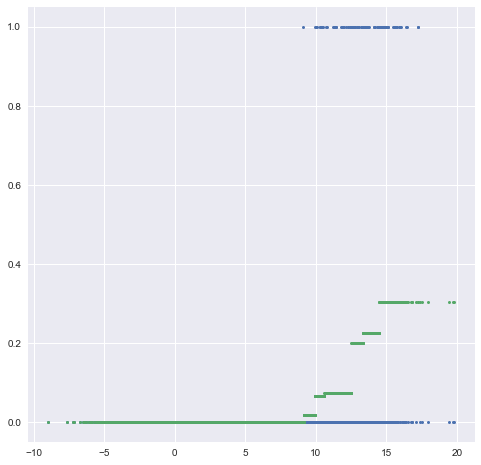

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(test_df['x'].values, test_df['y'].values, 'o', markersize=3)
ax.plot(test_df['x'].values, test_pred, 'o', markersize=3)
# ax.plot(x_axis,sp.stats.norm.pdf(x_axis,mean_2, var_2))
show()

In [17]:
from sklearn import metrics

In [18]:
fpr, tpr, thresh = metrics.roc_curve(test_df['y'].values, test_pred, pos_label=1)

In [19]:
m1_slope_x = np.arange(0,1,0.01)
m1_slope_y = np.array([1-i for i in m1_slope_x])

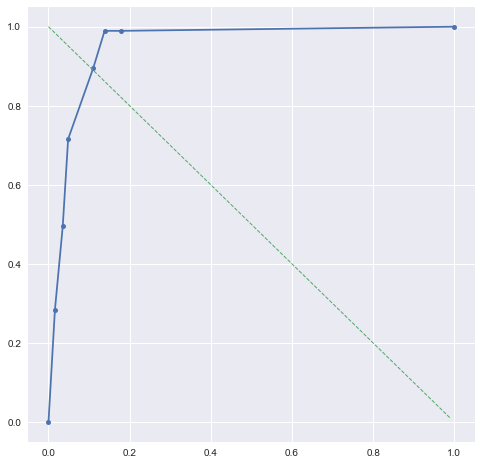

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr, tpr, marker = 'o', markersize=5)
ax.plot(m1_slope_x, m1_slope_y, linestyle = 'dashed', linewidth = 1)
show()

In [21]:
thresh

array([1.30473888e+00, 3.04738879e-01, 2.26285361e-01, 2.00120604e-01,
       7.23583048e-02, 6.58136854e-02, 1.81338180e-02, 3.52759542e-04])

In [22]:
metrics.roc_auc_score(test_df['y'].values, test_pred)

0.9509940022912595

In [23]:
[i for i in zip(fpr,tpr)]

[(0.0, 0.0),
 (0.01587708066581306, 0.28421052631578947),
 (0.035083226632522405, 0.49473684210526314),
 (0.048399487836107556, 0.7157894736842105),
 (0.11011523687580026, 0.8947368421052632),
 (0.1382842509603073, 0.9894736842105263),
 (0.17976952624839948, 0.9894736842105263),
 (1.0, 1.0)]

In [24]:
test_df['pred'] = test_pred

In [25]:
test_df['pre_bin'] = [0 if i < 0.06 else 1 for i in test_pred]

In [26]:
test_df.head(10)

,x,y,pred,pre_bin
0,7.826654,0.0,0.000353,0
1,0.138727,0.0,0.000353,0
2,10.200602,0.0,0.065814,1
3,9.247713,0.0,0.018134,0
4,-1.406002,0.0,0.000353,0
5,2.122452,0.0,0.000353,0
6,-2.504910,0.0,0.000353,0
7,5.839716,0.0,0.000353,0
8,-1.836698,0.0,0.000353,0
9,4.450425,0.0,0.000353,0


In [27]:
metrics.confusion_matrix(test_df['y'], test_df['pre_bin'])

array([[3365,  540],
       [   1,   94]])

In [28]:
test_df['y'].value_counts()

0.0    3905
1.0      95
Name: y, dtype: int64

In [29]:
test_df['pre_bin'].value_counts()

0    3366
1     634
Name: pre_bin, dtype: int64

In [30]:
metrics.accuracy_score(test_df['y'], test_df['pre_bin'])

0.86475

In [31]:
metrics.accuracy_score(test_df['y'], np.zeros_like(test_df['y']))

0.97625

In [32]:
metrics.confusion_matrix(test_df['y'], np.zeros_like(test_df['y']))

array([[3905,    0],
       [  95,    0]])

In [33]:
def make_sample(mean_a = 0, mean_b = 0, var_a = 1, var_b = 1
                , size_a = 100, size_b = 100):
    x_a = np.random.normal(loc=mean_a, scale=var_a, size=size_a)
    x_b = np.random.normal(loc=mean_b, scale=var_b, size=size_b)
    y_a = np.zeros_like(x_a)
    y_b = np.array(np.random.choice([0,1], size=size_b, p=[.5,.5]))
    conc_x = np.concatenate([x_a, x_b])
    conc_y = np.concatenate([y_a, y_b])
    data = {'x': conc_x, 'y': conc_y}
    df = pd.DataFrame(data = data)
    return df

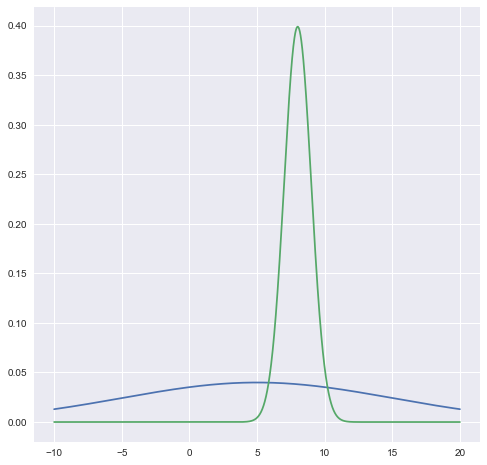

In [34]:
x_axis = np.arange(-10, 20, 0.01)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x_axis,sp.stats.norm.pdf(x_axis,5, 10))
ax.plot(x_axis,sp.stats.norm.pdf(x_axis,8, 1))
show()

In [35]:
gen_1 = make_sample(5,8,10,1,1900, 100)

In [36]:
gen_2 = make_sample(5,8,10,1,3800, 200)

In [37]:
def train_lgb(df_train, df_test, params):
    train_size = df_train.shape[0]
    test_size = df_test.shape[0]
    train_data = lgb.Dataset(df_train['x'].values.reshape((train_size,1))
                             , label=df_train['y'].values)
    test_data = lgb.Dataset(df_test['x'].values.reshape((test_size,1))
                             , label=df_test['y'].values)
    bst = lgb.train(params, train_data, num_boost_round=100, valid_sets= test_data
                    , early_stopping_rounds=10, verbose_eval=10)
    return bst

In [38]:
lgbmodel = train_lgb(gen_1, gen_2, param)

Training until validation scores don't improve for 10 rounds.
[10]	valid_0's binary_logloss: 0.105256
[20]	valid_0's binary_logloss: 0.0959513
[30]	valid_0's binary_logloss: 0.0899867
[40]	valid_0's binary_logloss: 0.0862245
[50]	valid_0's binary_logloss: 0.083817
[60]	valid_0's binary_logloss: 0.0823434
[70]	valid_0's binary_logloss: 0.0814246
[80]	valid_0's binary_logloss: 0.0808696
[90]	valid_0's binary_logloss: 0.0805705
[100]	valid_0's binary_logloss: 0.0803871
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0803871


In [39]:
test_pred = lgbmodel.predict(gen_2['x'].values.reshape((gen_2.shape[0],1)))

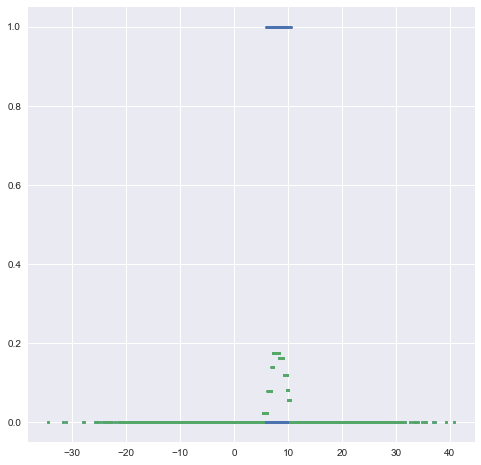

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(gen_2['x'].values, gen_2['y'].values, 'o', markersize=3)
ax.plot(gen_2['x'].values, test_pred, 'o', markersize=3)
# ax.plot(x_axis,sp.stats.norm.pdf(x_axis,mean_2, var_2))
show()

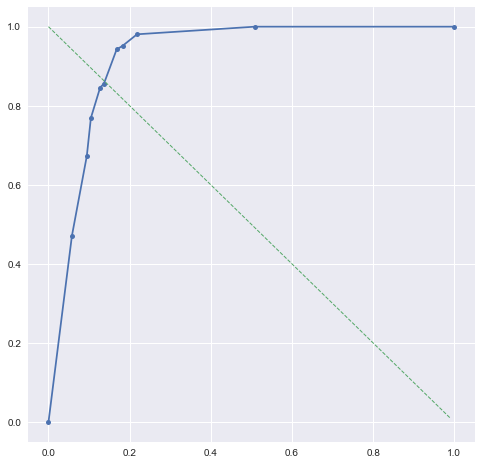

In [41]:
fpr, tpr, thresh = metrics.roc_curve(gen_2['y'].values, test_pred, pos_label=1)

m1_slope_x = np.arange(0,1,0.01)
m1_slope_y = np.array([1-i for i in m1_slope_x])

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr, tpr, marker = 'o', markersize=5)
ax.plot(m1_slope_x, m1_slope_y, linestyle = 'dashed', linewidth = 1)
show()

In [42]:
metrics.roc_auc_score(gen_2['y'].values, test_pred)

0.9236495024482705

In [43]:
thresh

array([1.17400950e+00, 1.74009496e-01, 1.61375531e-01, 1.40224825e-01,
       1.18268200e-01, 8.17769008e-02, 7.77156954e-02, 5.63520589e-02,
       2.34441485e-02, 1.30428523e-03, 8.12295124e-04])

In [44]:
precision, recall, threshold = metrics.precision_recall_curve(gen_2['y'].values, test_pred)

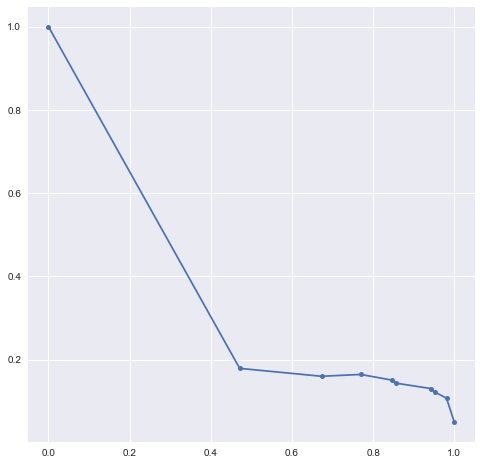

In [45]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(recall, precision, marker = 'o', markersize=5)
show()

In [46]:
threshold

array([0.00130429, 0.02344415, 0.05635206, 0.0777157 , 0.0817769 ,
       0.1182682 , 0.14022483, 0.16137553, 0.1740095 ])

In [47]:
x_axis = np.arange(-10,20,0.01)
class_1 = sp.stats.norm.pdf(x_axis,5, 10)
class_2 = sp.stats.norm.pdf(x_axis,8, 1)

In [48]:
ratio = [(i[1])/(i[0]+i[1]) for i in zip(class_1,class_2)]

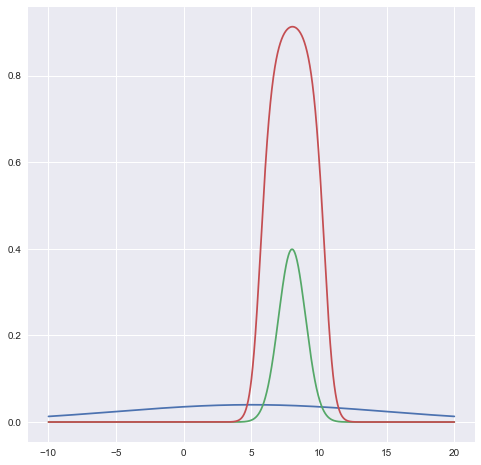

In [49]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(x_axis,sp.stats.norm.pdf(x_axis,5, 10))
ax.plot(x_axis,sp.stats.norm.pdf(x_axis,8, 1))
ax.plot(x_axis,ratio)
show()

In [62]:
x_a = np.random.normal(loc=5, scale=10, size=3900)
x_b = np.random.normal(loc=8, scale=1, size=100)
y_a = np.zeros_like(x_a)
y_b = np.ones_like(x_b)
conc_x = np.concatenate([x_a, x_b])
conc_y = np.concatenate([y_a, y_b])

In [63]:
pred_y = [ sp.stats.norm.pdf(i, 8, 1)/(sp.stats.norm.pdf(i, 8, 1)+sp.stats.norm.pdf(i, 5, 10)) for i in conc_x]

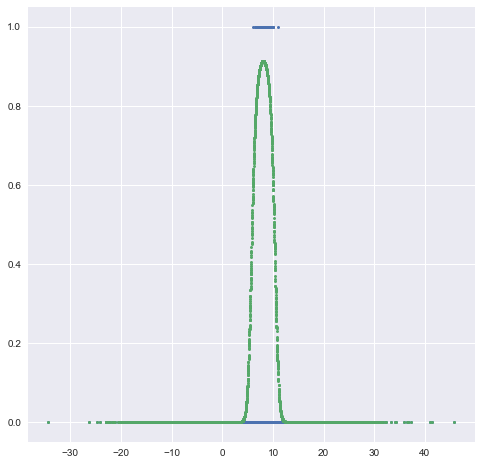

In [64]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(conc_x, conc_y, 'o', markersize=3)
ax.plot(conc_x, pred_y, 'o', markersize=3)
# ax.plot(x_axis,sp.stats.norm.pdf(x_axis,mean_2, var_2))
show()

In [65]:
precision_e, recall_e, threshold_e = metrics.precision_recall_curve(conc_y, pred_y)

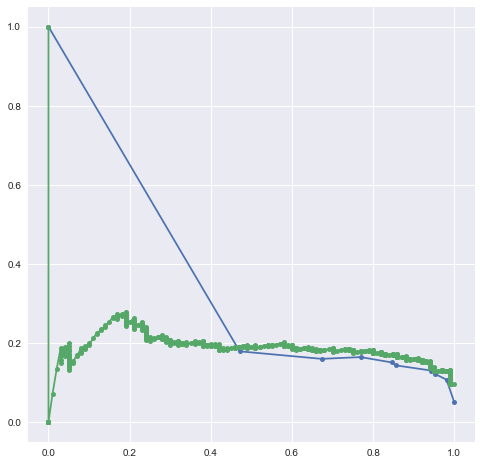

In [66]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(recall, precision, marker = 'o', markersize=5)
ax.plot(recall_e, precision_e, marker = 'o', markersize=5)
show()

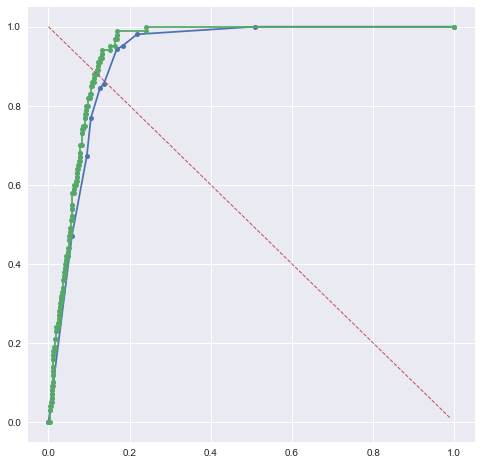

In [67]:
fpr, tpr, thresh = metrics.roc_curve(gen_2['y'].values, test_pred, pos_label=1)
fpr_e, tpr_e, thresh_e = metrics.roc_curve(conc_y, pred_y, pos_label=1)

m1_slope_x = np.arange(0,1,0.01)
m1_slope_y = np.array([1-i for i in m1_slope_x])

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr, tpr, marker = 'o', markersize=5)
ax.plot(fpr_e, tpr_e, marker = 'o', markersize=5)
ax.plot(m1_slope_x, m1_slope_y, linestyle = 'dashed', linewidth = 1)
show()